# Input

This should be the only cell to make change, everything else should run by itself

In [13]:
queries = ["hawk", "cow", "hen"]
num_image_per_class = 2

# Run

In [ ]:
# !git clone https://github.com/VikTeam-FinalProject/IT_Project.git

In [ ]:
!pip install -q selenium bs4 ultralytics selenium

In [15]:
# from IT_Project.backend.blueprints.api.models.Crawler import Crawler
import sys, os, cv2
sys.path.append('..')
from api.models.Crawler import Crawler
from autoannotate import Labeler

In [ ]:
def visualize_detection():
    img_paths = sorted(os.listdir(os.path.join(HOME, 'output', 'images')))
    annotation_path = sorted(os.listdir(os.path.join(HOME, 'output', 'annotations')))
    os.makedirs(os.path.join(HOME, 'output', 'images_with_bbox'), exist_ok=True)
    for i in range(len(img_paths)):
        img = cv2.imread(os.path.join(HOME,'output','images', img_paths[i]))
        annotation = read_classes(os.path.join(HOME, 'output', 'annotations', annotation_path[i]))
        img_name = img_paths[i].split('.')[0]

        img_with_bbox = draw_bbox(img, annotation, ['people', 'car'])
        cv2.imwrite(os.path.join(HOME, 'output', 'images_with_bbox', img_name + '_bbox.jpg'), img_with_bbox)

### 1. Crawl image

Up to n image per class, ready to train

In [3]:
HOME = os.getcwd()
image_folder = os.path.join(HOME, 'images')
image_raw_folder = os.path.join(image_folder, 'raw_images')
os.makedirs(image_raw_folder, exist_ok=True)            

In [6]:

for query_class in queries:
    crawler = Crawler()
    images_data = crawler.crawl(queries, img_num=num_image_per_class)
    Crawler.quit_driver()
    crawler.download_images(images_data, download_folder=image_raw_folder)   

    print(f"Downloaded {num_image_per_class} images of {query_class} to {image_raw_folder}")

https://www.google.com/search?q=hawk&tbm=isch
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8TXaR272xNAa9y7vizLvvdIZ4s13WpmtCAA&s 

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUh0pfpmqrrDO4YwJxxw36jbeYMmU3sfJ6dg&s 

https://www.google.com/search?q=cow&tbm=isch
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwi0JRdog5jhm1Fs3cU88DOz1oaMSkluwMFQ&s 

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRpJeuxffkAuDu_gDApko6xAv9Rd5qiDriutg&s 

https://www.google.com/search?q=hen&tbm=isch
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThhhrhSsfHy-X-Qi9RA_ZsG445RaiPBYdmSw&s 

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRg4XajnarSl2YnTxA49IH-qYeMS2YjBSJAzQ&s 

Downloaded: /home/thekhoi/futme/RTD-ueh/IT_Project/backend/blueprints/detection/images/raw_images/cow_1.jpg
Downloaded: /home/thekhoi/futme/RTD-ueh/IT_Project/backend/blueprints/detection/images/raw_images/hen_1.jpg
Downloaded: /home/thekhoi/futme/RTD-ueh/IT_Project/backend/blueprints/detectio

Enhance images:   
    - Remove duplicates, animations, placeholder

In [7]:
...

Ellipsis

### 2. Label images

In [4]:
classes= queries
input_folder = image_raw_folder
output_folder = os.path.join(image_folder, f"labeled_images")
extension = '.jpg'

print(f"Ther are {len(os.listdir(input_folder))} images in {input_folder}")

labeler = Labeler()
# labeler.label_images(classes, input_folder, output_folder, extension)

Ther are 6 images in /home/thekhoi/futme/RTD-ueh/IT_Project/backend/blueprints/detection/images/raw_images


In [9]:
os.listdir(output_folder)

['images', 'annotations', 'valid', 'data.yaml', 'train']

In [5]:
# how many images in train val
train_folder = os.path.join(output_folder, 'train', 'images')
val_folder = os.path.join(output_folder, 'valid', 'images')
print(f"There are {len(os.listdir(train_folder))} images in TRAIN folder")
print(f"There are {len(os.listdir(val_folder))} images in  VALID folder")

_num_im_show = min(10, len(os.listdir(train_folder)))
print(f"First 10 images in train: {os.listdir(train_folder)[:_num_im_show]}")

There are 9 images in TRAIN folder
There are 4 images in  VALID folder
First 10 images in train: ['hawk_2.jpg', 'hen_3.jpg', 'cow_1.jpg', 'cow_2.jpg', 'hen_2.jpg', 'hawk_1.jpg', 'cow_3.jpg', 'hawk_3.jpg', 'hen_1.jpg']


Show labeled images

There are 9 images in images_with_bbox folder


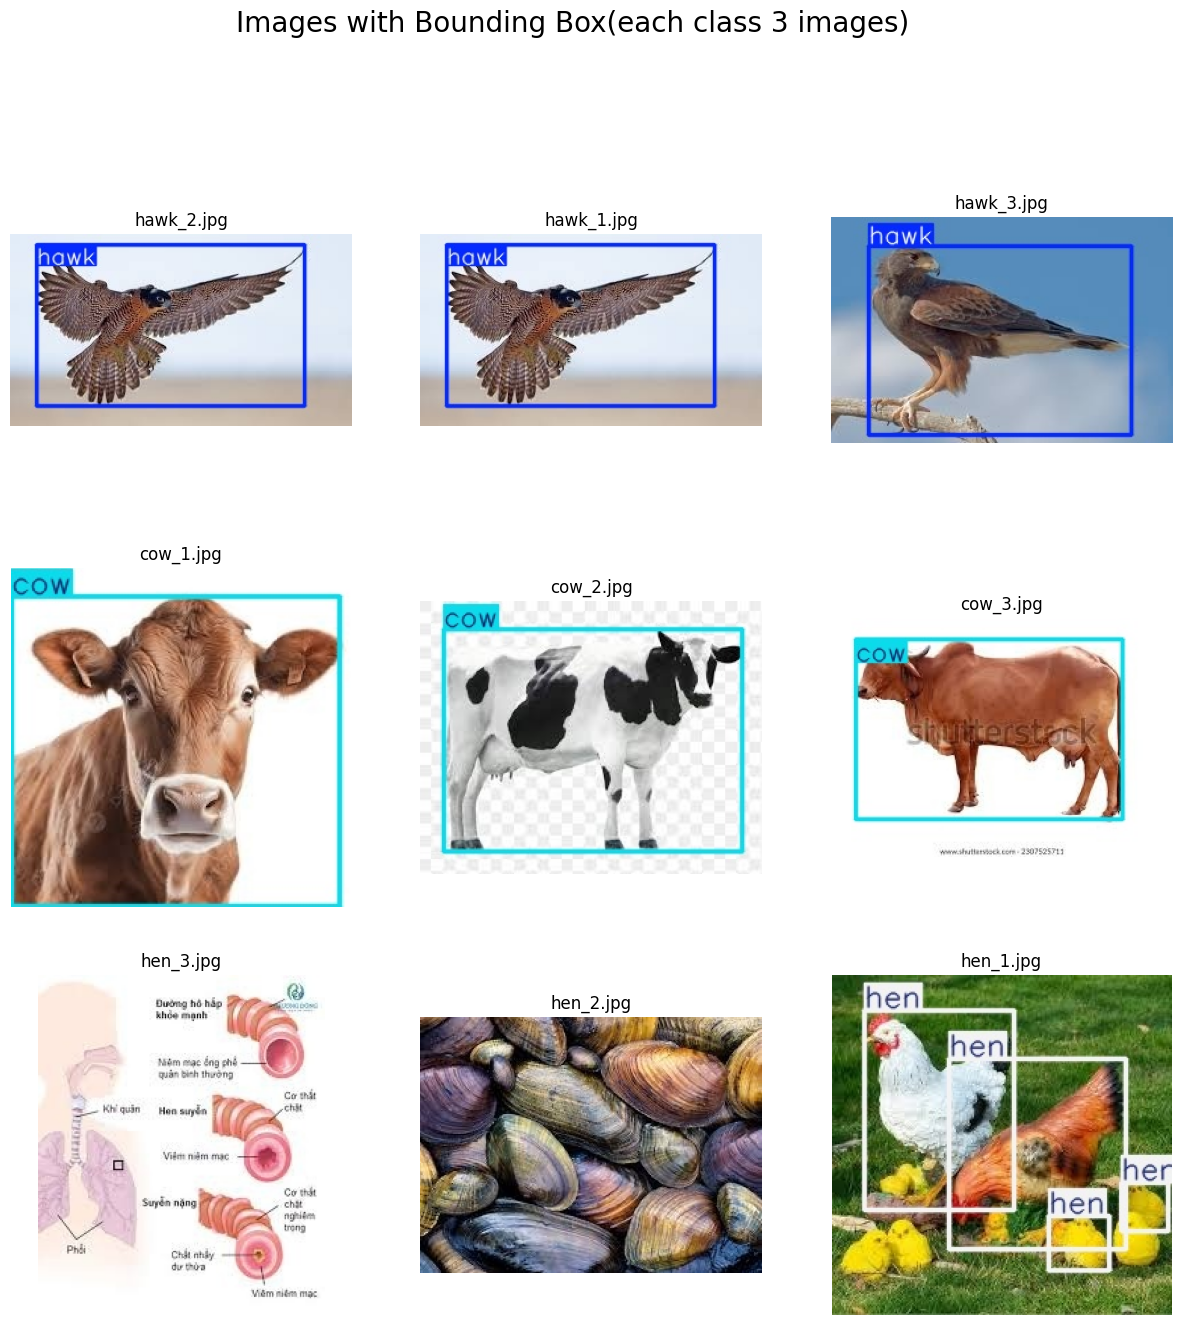

In [12]:
from utils import draw_bbox
os.makedirs(os.path.join(image_folder, 'images_with_bbox'), exist_ok=True)
# take image in train images
labelpath_template = os.path.join(output_folder, 'train', 'labels', '{}.txt')
for im_path in os.listdir(train_folder):
    im = cv2.imread(os.path.join(train_folder, im_path))
    labelpath = labelpath_template.format(im_path.split('.')[0])

    with open(labelpath, 'r') as f:
        lines = [line.strip().split(' ') for line in f.readlines()]

    # print('imname: ', im_path)
    # print(lines)
    image_with_bbox = draw_bbox(im, lines, classes)
    cv2.imwrite(os.path.join(image_folder, 'images_with_bbox', im_path), image_with_bbox)
    # break

# how many images in folder images_with_bbox
print(f"There are {len(os.listdir(os.path.join(image_folder, 'images_with_bbox')))} images in images_with_bbox folder")

# plot each class 3 images
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15, 15))
# title
fig.suptitle('Images with Bounding Box(each class 3 images)', fontsize=20)
for i, class_name in enumerate(classes):
    im_paths = os.listdir(os.path.join(image_folder, 'images_with_bbox'))
    im_paths = [im_path for im_path in im_paths if class_name in im_path]
    im_paths = im_paths[:3]
    for j, im_path in enumerate(im_paths):
        im = cv2.imread(os.path.join(image_folder, 'images_with_bbox', im_path), )
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        ax = fig.add_subplot(len(classes), 3, i*3+j+1)
        ax.imshow(im)
        ax.axis('off')
        ax.set_title(im_path)
    

### 3. Train

In [16]:
sys.path.append('.')
from yolo import Model_YOLO

model = Model_YOLO()

In [13]:
data_yaml = os.path.join(output_folder, 'data.yaml')
model.train(data_yaml)

Ultralytics YOLOv8.2.41 🚀 Python-3.9.18 torch-2.3.1+cu121 CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/thekhoi/futme/RTD-ueh/IT_Project/backend/blueprints/detection/images/labeled_images/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=., name=train, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

train: Scanning /home/thekhoi/futme/RTD-ueh/IT_Project/backend/blueprints/detection/images/labeled_images/train/labels.cache... 9 images, 2 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
val: Scanning /home/thekhoi/futme/RTD-ueh/IT_Project/backend/blueprints/detection/images/labeled_images/valid/labels.cache... 4 images, 1 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.137      3.662      1.616         30        640: 100%|██████████| 1/1 [00:05<00:00,  6.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all          4          3       0.97        0.5      0.912      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.026      2.534      1.581         23        640: 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all          4          3      0.734       0.75      0.845      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.8701      2.093        1.4         19        640: 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          4          3          1      0.473      0.995      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.052      2.211      1.414         32        640: 100%|██████████| 1/1 [00:06<00:00,  6.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          4          3      0.035          1     0.0388     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.8347      1.583       1.26         21        640: 100%|██████████| 1/1 [00:06<00:00,  6.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4          3    0.00465        0.5    0.00561    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.7511      1.601      1.247         30        640: 100%|██████████| 1/1 [00:07<00:00,  7.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4          3    0.00642          1      0.191     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.9285      1.814      1.343         33        640: 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all          4          3      0.564        0.5      0.143      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.9739      1.986      1.287         33        640: 100%|██████████| 1/1 [00:06<00:00,  6.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4          3     0.0212        0.5     0.0473     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.465      1.936      1.878         21        640: 100%|██████████| 1/1 [00:07<00:00,  7.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4          3      0.828        0.5      0.447      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.208      2.177      1.732         15        640: 100%|██████████| 1/1 [00:07<00:00,  7.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          4          3       0.26          1      0.448      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.668        2.6       1.87         26        640: 100%|██████████| 1/1 [00:06<00:00,  6.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          4          3      0.512          1      0.912      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.412      2.394      1.768         29        640: 100%|██████████| 1/1 [00:07<00:00,  7.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all          4          3      0.161          1      0.273     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G       1.55      2.447      1.935         22        640: 100%|██████████| 1/1 [00:07<00:00,  7.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          4          3     0.0478        0.5      0.193     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.349      2.539      1.721         18        640: 100%|██████████| 1/1 [00:06<00:00,  6.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          4          3     0.0787        0.5      0.126     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.606       2.41      2.192         16        640: 100%|██████████| 1/1 [00:06<00:00,  6.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          4          3     0.0318        0.5      0.281      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.359      2.331      1.518         23        640: 100%|██████████| 1/1 [00:07<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          4          3     0.0477        0.5      0.281      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.145      1.691      1.532         28        640: 100%|██████████| 1/1 [00:06<00:00,  6.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all          4          3    0.00444        0.5    0.00865    0.00346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.843      3.413      2.052         33        640: 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all          4          3    0.00444        0.5    0.00865    0.00346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.234      1.939      1.573         27        640: 100%|██████████| 1/1 [00:06<00:00,  7.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all          4          3     0.0156        0.5     0.0257    0.00974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G       1.69      2.509      1.901         21        640: 100%|██████████| 1/1 [00:06<00:00,  6.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all          4          3     0.0156        0.5     0.0257    0.00974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.441      2.541      1.746         30        640: 100%|██████████| 1/1 [00:06<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all          4          3     0.0357        0.5     0.0415     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.553      2.306      1.891         21        640: 100%|██████████| 1/1 [00:06<00:00,  6.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all          4          3     0.0357        0.5     0.0415     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.038      1.659       1.59         20        640: 100%|██████████| 1/1 [00:06<00:00,  6.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all          4          3     0.0135        0.5     0.0286     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.543      2.084      1.789         31        640: 100%|██████████| 1/1 [00:06<00:00,  6.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all          4          3     0.0135        0.5     0.0286     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.642      2.094      2.009         20        640: 100%|██████████| 1/1 [00:05<00:00,  5.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all          4          3    0.00419          1    0.00678    0.00338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.268      2.575      1.678         22        640: 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all          4          3    0.00419          1    0.00678    0.00338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.254      2.225      1.734         26        640: 100%|██████████| 1/1 [00:06<00:00,  6.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.548      2.074      1.847         27        640: 100%|██████████| 1/1 [00:05<00:00,  5.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.594      2.266      1.833         29        640: 100%|██████████| 1/1 [00:07<00:00,  7.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G       1.58      2.189      1.912         24        640: 100%|██████████| 1/1 [00:06<00:00,  6.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.528      2.189      1.813         25        640: 100%|██████████| 1/1 [00:06<00:00,  6.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.434      2.036       1.86         22        640: 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.311      1.785      1.693         23        640: 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.431      1.866      1.798         28        640: 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.777      1.914      1.997         22        640: 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.529      1.641      1.755         27        640: 100%|██████████| 1/1 [00:06<00:00,  6.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.598      2.432      1.954         22        640: 100%|██████████| 1/1 [00:06<00:00,  6.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.443      1.994      1.717         27        640: 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.707      1.614      1.843         30        640: 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.367      1.525      1.565         27        640: 100%|██████████| 1/1 [00:05<00:00,  5.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.247      1.868      1.732         21        640: 100%|██████████| 1/1 [00:06<00:00,  6.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all          4          3    0.00333       0.25    0.00285   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
model.model.save()

### 4. Evaluate the trained model, save result